In [1]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np

from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc, Straub2010Ec
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, ExponFrag, AlwaysN, Straub2010Nf
from PySDM.physics.constants import si
import PySDM.physics.constants as const
from PySDM.physics.trivia import Trivia

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9897821e+05 6.0200000e+00 9.9897821e+05 0.0000000e+00]
 [1.0064900e+03 0.0000000e+00 1.0064900e+03 0.0000000e+00]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16627304e+06 0.00000000e+00 1.10739636e+06 5.78623000e+04]
 [3.98367000e+03 0.00000000e+00 3.77425000e+03 2.04000000e+02]]
finished Ec=0.9
[[      0.         0.         0.         0.  ]
 [1395210.8        0.   1254379.84  139460.46]
 [  19213.79       0.     17290.63    1882.66]]
finished Ec=0.8
[[      0.         0.         0.         0.  ]
 [2011234.5        0.   1618508.95  387667.07]
 [ 253357.61       0.    201956.37   50699.09]]
finished Straub
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00588922e+06 0.00000000e+00 1.00304366e+06 2.75481000e+03]
 [3.10658000e+03 0.00000000e+00 2.53480000e+03 5.67810000e+02]]


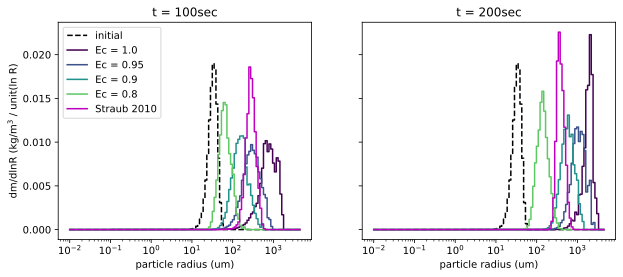

HTML(value="<a href='./figures_Ec_sensitivity.pdf' target='_blank'>./figures_Ec_sensitivity.pdf</a><br>")

In [3]:
settings = Settings0D()

rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings.fragmentation = AlwaysN(n=4, vmin=vmin)

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9, 0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
ax[1].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        if Ec == 1.0:
            lbl = 'Ec = 1.0'
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Straub2010Ec()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Straub 2010'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Straub")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("t = 100sec")
ax[1].set_title("t = 200sec")
show_plot('figures_Ec_sensitivity.pdf')

## Sensitivity to n_f

finished nf=2
[[     0.         0.         0.         0.   ]
 [925652.075      0.    830467.225  94866.925]]
finished nf=4
[[      0.               0.               0.               0.        ]
 [1172801.93333333       0.         1054428.3         117209.63333333]]
finished nf=5
[[      0.               0.               0.               0.        ]
 [1322178.975            0.         1191720.04166667  128662.66666667]]
finished nf=6
[[      0.               0.               0.               0.        ]
 [1543994.05833333       0.         1388271.06666667  152180.13333333]]


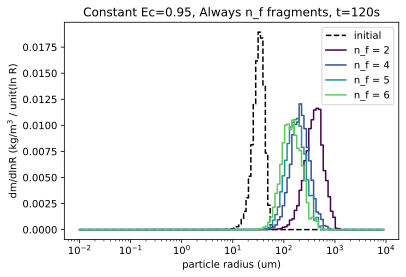

HTML(value="<a href='./figures_nf_sensitivity_constEc.pdf' target='_blank'>./figures_nf_sensitivity_constEc.pd…

In [4]:
settings = Settings0D()

settings.coal_eff = ConstEc(Ec=0.90)
#settings.coal_eff = Berry1967()
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(10000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

nf_vals = [2, 4, 5, 6]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=1,sharey=True,figsize=(6,4),dpi=200)
ax.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

for (i, nf) in enumerate(nf_vals):
    settings.fragmentation = AlwaysN(n=nf)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += ' (coalescence)'
        ax.step(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)

ax.set_xscale("log")
ax.set_xlabel("particle radius (um)")
ax.set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax.legend()
ax.set_title("Constant Ec=0.95, Always n_f fragments, t=120s")
show_plot('figures_nf_sensitivity_constEc.pdf')

## Sensitivity to n_f distribution parameters

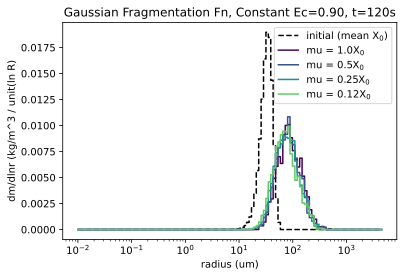

HTML(value="<a href='./figures_gaussian_mu_sensitivity_constEc.pdf' target='_blank'>./figures_gaussian_mu_sens…

In [5]:
settings = Settings0D()
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
X0 = settings.X0
mu_vals = [X0, X0/2, X0/4, X0/8]
sigma = X0 / 2.5
vmin = X0 * 1e-3
nfmax = 10
Ec = 0.90
settings.coal_eff=ConstEc(Ec=Ec)
#settings.coal_eff=Berry1967()
#settings.coal_eff=Straub2010Ec()

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial (mean X$_0$)')

for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = Gaussian(mu=mu, sigma=mu/2.5, vmin=vmin, nfmax=nfmax)
    (x,y, rates) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'mu = ' + str(round(mu/X0,2)) + 'X$_0$'
        pyplot.step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.title("Gaussian Fragmentation Fn, Constant Ec=0.90, t=120s")
show_plot('figures_gaussian_mu_sensitivity_constEc.pdf')
# pyplot.title("Gaussian Fragmentation Fn, Straub 2010 Ec")
# pyplot.savefig('figures/gaussian_mu_sensitivity_berry.png')


## Fully Stochastic: Straub 2010

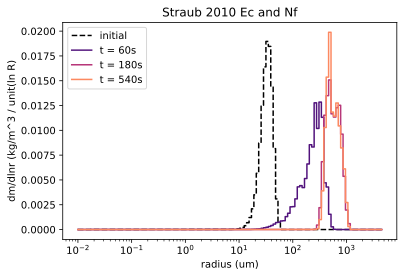

HTML(value="<a href='./figures_straub_box.pdf' target='_blank'>./figures_straub_box.pdf</a><br>")

In [6]:
settings = Settings0D()
t_steps = [0, 60, 180, 540]
cmap = matplotlib.cm.get_cmap('magma')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
vmin = X0 * 1e-3
nfmax = 10
settings.coal_eff=Straub2010Ec()
settings.fragmentation=Straub2010Nf(vmin=vmin, nfmax=nfmax)

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

(x,y, rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    pyplot.step(x,y[j]*settings.rho, color=cmap(j/len(t_steps)),linestyle='-',
            label=f't = {step}s')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.title("Straub 2010 Ec and Nf")
show_plot('figures_straub_box.pdf')